In [1]:
!pip install gensim

  Created wheel for smart-open: filename=smart_open-1.10.0-py3-none-any.whl size=90637 sha256=2ccc537284580436226f078535c6eddfdbe82adbc345e6db55b96ce50f895f6a
  Stored in directory: c:\users\theunlikelymonk\appdata\local\pip\cache\wheels\a1\f3\8a\c46924c44ee290a85840f98cab840a65669cd377175eaf6850
Successfully built smart-open


In [12]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [13]:
# Define training data
sentences = [['this','is','the','first','sentence','for','word2vec'],
            ['this','is','the','second','sentence'],
            ['yet','another','sentence'],
            ['one','more','sentence'],
            ['and','the','final','sentence']]

In [15]:
#train model
model = Word2Vec(sentences,min_count=1)
# Summarise the model
print(model)

Word2Vec(vocab=14, size=100, alpha=0.025)


In [16]:
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

c:\users\theunlikelymonk\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [17]:
#Summarize vocabulary
words = list(model.wv.vocab)
print(words)

['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']


In [18]:
# access vector for one word
print(model['sentence'])

c:\users\theunlikelymonk\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


[ 3.4157713e-03  2.1651920e-03 -3.1990046e-03 -2.1566951e-03
  4.3502352e-03  1.7357247e-03 -3.6820339e-03 -1.6512104e-03
 -3.5524743e-03 -3.0200749e-03  4.9361559e-03  4.1240291e-03
  1.5827563e-03 -2.9588761e-03 -2.7712056e-05 -3.9380426e-03
 -3.1860897e-03 -1.2924325e-03 -4.9374043e-03  1.6962021e-04
 -2.3645444e-03  2.8222057e-03  4.7009829e-03 -3.5858394e-03
  2.3584422e-03 -4.5687752e-03 -3.3191191e-03  3.2953830e-03
 -3.3661092e-03  3.3382189e-03 -8.2191039e-04  4.2131329e-03
  2.6549986e-03 -2.5538441e-03  3.6826166e-03 -3.2792289e-03
  1.2310329e-03  4.0533366e-03  4.6364865e-03  9.2105992e-04
 -1.4425275e-03  3.0273621e-03  4.6625724e-03  2.1843652e-03
 -2.0122479e-03  2.9673974e-03 -1.9512009e-03 -6.5422873e-04
 -3.9932397e-03  4.3527158e-03  3.0947209e-03 -4.0597194e-03
  4.5601290e-04  3.4741487e-03 -4.7264132e-04  5.0356454e-04
  7.9256092e-04  9.8401902e-04 -7.2213565e-04  4.1520353e-03
  4.8057763e-03 -2.3300762e-04 -3.6610411e-03  6.7667011e-04
  1.1602486e-03  2.41804

In [19]:
#save model
model.save('model.bin')

In [20]:
# load model
new_model = Word2Vec.load('model.bin')

In [21]:
print(new_model)

Word2Vec(vocab=14, size=100, alpha=0.025)


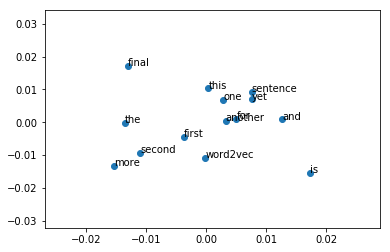

In [24]:
# Create a scatter plot of the projection
pyplot.scatter(result[:,0], result[:,1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word,xy=(result[i,0],result[i,1]))
pyplot.show()